In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns
from sklearn import neighbors
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from matplotlib import gridspec

In [2]:
''' This study investigates potential associations of screen time and outdoor play (as a 
proxy for physical activity) with social skills. Cross sectional data were available for 
575 mothers with a child (54% boys) aged 2–5 years. Mothers reported their child’s screen 
time, outdoor play time and social skills'''
#https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0193700
#https://dro.deakin.edu.au/view/DU:30106962
df = pd.read_csv('stdataset.csv')
df.columns = ["ID", 'gender', 'age', 'disability', 'mothersEdu', 'allSocialSkills', 'express', 'comply', 'disrupt',
              'meetStReqs', 'meetPhysReqs', 'screenTime', 'tvTime', 'cpuTime', 'outdoorTime']
df.disability = np.where(df.disability == 'Yes', 1, 0)
print(df.shape)
df.head()

(575, 15)


,ID,gender,age,disability,mothersEdu,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime
0,30208,Female,3.030801,0,3,78,38,24,12,0,0,3.000000,2.000000,1.0,1.500000
1,30400,Female,3.865845,0,3,82,39,27,10,1,1,0.000000,0.000000,0.0,4.000000
2,30863,Female,2.130048,0,3,68,35,18,11,1,0,0.857143,0.857143,0.0,1.714286
3,30530,Male,2.105407,0,3,63,29,20,12,1,0,0.500000,0.500000,0.0,1.500000
4,300057,Female,2.403833,0,3,78,38,25,11,1,0,0.357143,0.357143,0.0,1.500000


# Notes on the columns, where necessary:
- **disability**: self-reported
- **mothersEdu**: 1 means 10 years or less, 2 means 12 years or a equivalent of a trade school, and 3 means 14+ years or high education
- **allSocialSkills**: summary of the following 3 categories, all self-reported by the mother
- **express**: Mother rates their child's ability to express themself using thirteen subcategories on 3 point Likert scale. All her choices are summed
- **comply**: Mother rates their child's tendency to comply using ten subcategories on 3 point Likert scale. All her choices are summed
- **disrupt**: Mother rates their child's tendency to disrupt on seven subcategories on 3 point Likert scale. All her choices are summed
- **meetStReqs**: Whether or not this family meets the country's (AUS) screen time recommendations. this is a dichotomized version of the 3 screen time variables below
- **meetPhysReqs**: Whether or not this family meets the country's (AUS) physical activity recommendations. this is a dichotomized version of the outdoor play variable below
- **screenTime, tvTime, cpuTime, outdoorTime**: Average hours per day, reported by mother


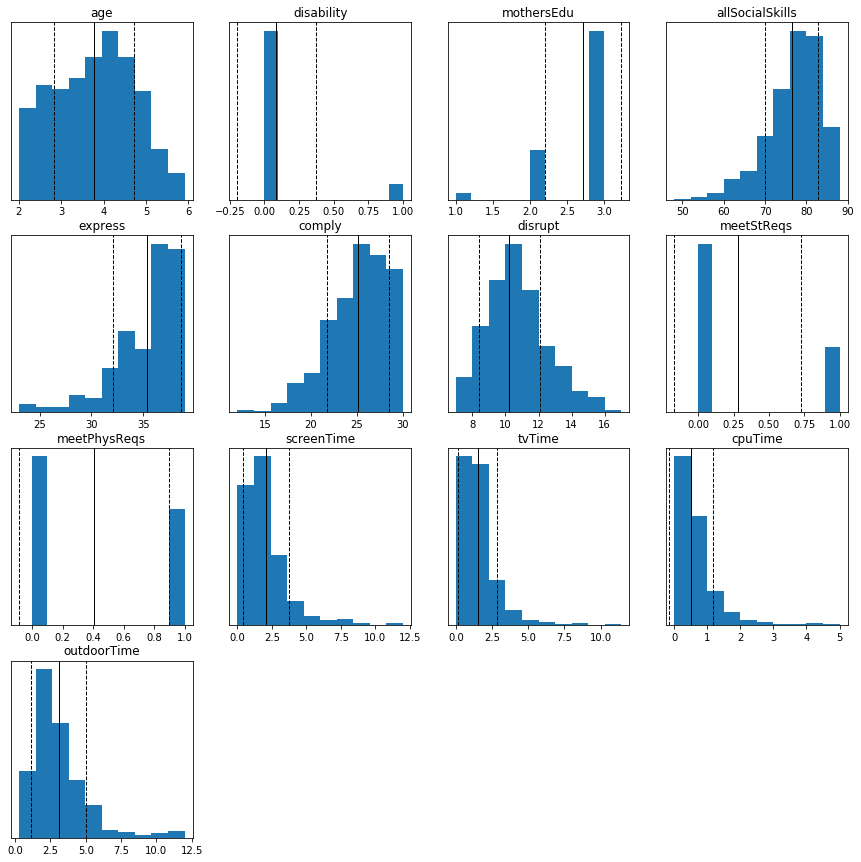

In [3]:
plt.figure(figsize=[15,15])
for j,x in enumerate(df.columns[2:]):
    plt.subplot(4,4,j+1)
    plt.hist(df[x])
    plt.axvline(df[x].mean(), color='k', linestyle='solid', linewidth=1)
    plt.axvline(df[x].mean() - df[x].std(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(df[x].mean() + df[x].std(), color='k', linestyle='dashed', linewidth=1)
    plt.yticks([])
    plt.title(x)
plt.show()

In [143]:
#predict allss with the 3 pieces?
#pairplot?
#Show the boxplots, sigma with each feature

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


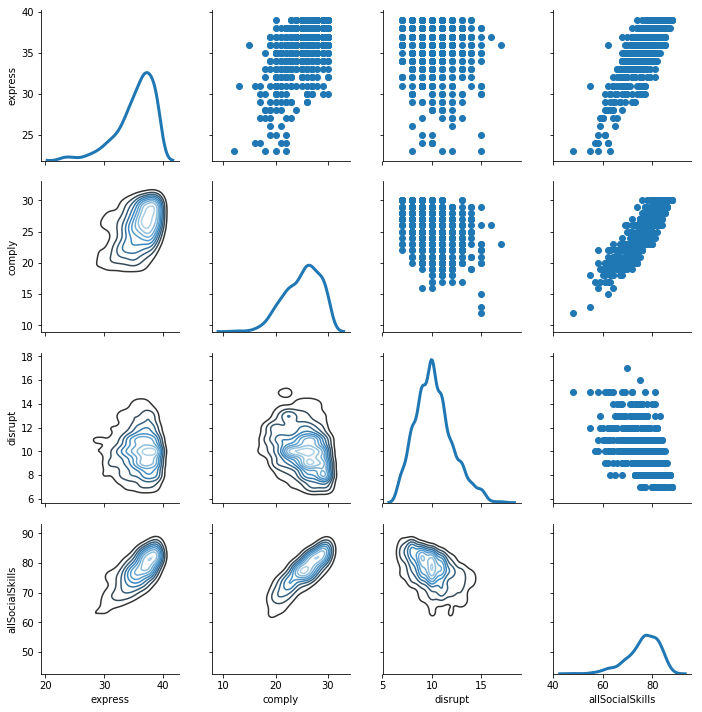

In [147]:

g = sns.PairGrid(df[['express', 'comply', 'disrupt', 'allSocialSkills']])
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(sns.kdeplot, lw=3, legend=False)
plt.show()

In [148]:
regr = linear_model.LinearRegression()
x = df[['disability', 'mothersEdu','tvTime', 'cpuTime', 'outdoorTime']]
y = df.allSocialSkills
regr.fit(x,y)
scores = cross_val_score(regr,x,y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))

Fold Scores:  [-0.04434238 -0.0884137  -0.17036225  0.05287672  0.0059761   0.03814937
  0.03455728  0.02748817  0.02913131  0.0299505 ]

Average Score:  -0.008498887391842225


In [149]:
#statsmodels
linear_formula = 'allSocialSkills ~ disability+mothersEdu+tvTime+cpuTime+outdoorTime'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        allSocialSkills   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     5.842
Date:                Mon, 31 Dec 2018   Prob (F-statistic):           2.83e-05
Time:                        22:08:48   Log-Likelihood:                -1870.0
No. Observations:                 575   AIC:                             3752.
Df Residuals:                     569   BIC:                             3778.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      76.5702      1.600     47.855      0.000      73.427      79.713
disability     -3.7430      0.933     -4.013      0.000      -5.575      -1.911
mothersEdu     -0.1163      0.522     -0.223      0.824      -1.141       0.909
tvTime         -0.4372      0.214     -2.040      0.042      -0.858      -0.016
cpuTime        -0.3473      0.418     -0.832      0.406      -1.168       0.473
outdoorTime     0.4500      0.142      3.160      0.002       0.170       0.730
==============================================================================
Omnibus:                       46.008   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.891
Skew:                          -0.732   Prob(JB):                     1.20e-12
Kurtosis:                       3.383   Cond. No.                         30.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

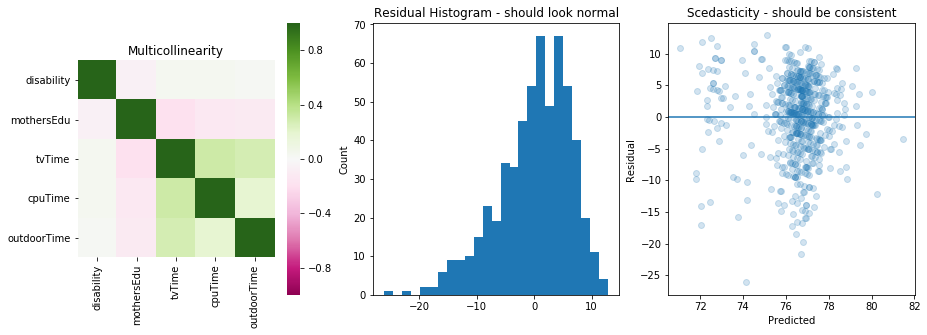

In [150]:
#Let's check how our output looks:
pred = cross_val_predict(regr,x,y,cv=5)
residual = y - pred

plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('Multicollinearity')
sns.heatmap(x.corr(), vmin = -1,square=True, cmap="PiYG")
plt.subplot(132)
plt.hist(residual, bins=25)
plt.title('Residual Histogram - should look normal')
plt.ylabel('Count')
plt.subplot(133)
plt.scatter(pred, residual, alpha=.2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Scedasticity - should be consistent')
plt.show()

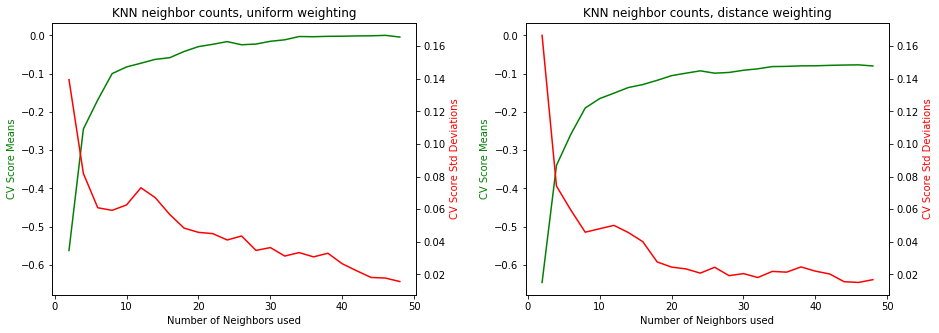

In [12]:
def knnChart(x,y):
    x = pd.DataFrame(x)
    neighborCounts = range(2,50,2)
    plt.figure(figsize=[15,5])
    ax1 = plt.subplot(121)
    stds = []
    means = []
    for i in neighborCounts:
        knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='uniform')
        knn.fit(x,y)
        scores = cross_val_score(knn,x,y, cv=5)
        means.append(np.mean(scores))
        stds.append(np.std(scores))
    plt.title('KNN neighbor counts, uniform weighting')
    ax1.plot(neighborCounts,means, color='g')
    plt.ylabel('CV Score Means', color='g')
    plt.xlabel('Number of Neighbors used')
    ax2 = ax1.twinx() 
    ax2.plot(neighborCounts,stds, color='r')
    plt.ylabel('CV Score Std Deviations', color='r')
    #plt.show()
    #same with distance weighting
    ax3 = plt.subplot(122)
    ax1.get_shared_y_axes().join(ax1, ax3)
    stds = []
    means = []
    for i in neighborCounts:
        knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
        knn.fit(x,y)
        scores = cross_val_score(knn,x,y, cv=5)
        means.append(np.mean(scores))
        stds.append(np.std(scores))
    plt.title('KNN neighbor counts, distance weighting')
    ax3.plot(neighborCounts,means, color='g')
    plt.ylabel('CV Score Means', color='g')
    plt.xlabel('Number of Neighbors used')
    ax4 = ax3.twinx()
    ax2.get_shared_y_axes().join(ax2, ax4)
    ax4.plot(neighborCounts,stds, color='r')
    plt.ylabel('CV Score Std Deviations', color='r')
    plt.subplots_adjust(wspace=.3)
    plt.show()

x = df[['disability', 'mothersEdu','tvTime', 'cpuTime', 'outdoorTime']]
y = df.allSocialSkills

knnChart(x,y)  
#add a grid

In [13]:
def rfrEsts(x,y):
    x = pd.DataFrame(x)
    estimators = range(50,300,25)
    plt.figure(figsize=[15,5])
    ax1 = plt.subplot(121)
    stds = []
    means = []
    for i in estimators:
        rfr = ensemble.RandomForestRegressor(n_estimators=i, criterion='mse')
        rfr.fit(x,y)
        scores = cross_val_score(rfr,x,y, cv=5)
        means.append(np.mean(scores))
        stds.append(np.std(scores))
    plt.title('Random Forest Regressor, MSE criterion')
    ax1.plot(estimators,means, color='g')
    plt.ylabel('CV Score Means', color='g')
    plt.xlabel('Number of estimators used')
    ax2 = ax1.twinx() 
    ax2.plot(estimators,stds, color='r')
    plt.ylabel('CV Score Std Deviations', color='r')
    #same with mean absolute error used
    ax3 = plt.subplot(122)
    ax1.get_shared_y_axes().join(ax1, ax3)
    stds = []
    means = []
    for i in estimators:
        rfr = ensemble.RandomForestRegressor(n_estimators=i, criterion='mae')
        rfr.fit(x,y)
        scores = cross_val_score(rfr,x,y, cv=5)
        means.append(np.mean(scores))
        stds.append(np.std(scores))
    plt.title('Random Forest Regressor, MAE criterion')
    ax3.plot(estimators,means, color='g')
    plt.ylabel('CV Score Means', color='g')
    plt.xlabel('Number of estimators  used')
    ax4 = ax3.twinx()
    ax2.get_shared_y_axes().join(ax2, ax4)
    ax4.plot(estimators,stds, color='r')
    plt.ylabel('CV Score Std Deviations', color='r')
    plt.subplots_adjust(wspace=.3)
    plt.show()
    
def rfrDepth(x,y,n_est):
    x = pd.DataFrame(x)
    depth = range(1,5)
    plt.figure(figsize=[15,5])
    ax1 = plt.subplot(121)
    stds = []
    means = []
    for i in depth:
        rfr = ensemble.RandomForestRegressor(n_estimators=n_est, criterion='mse', max_depth=i)
        rfr.fit(x,y)
        scores = cross_val_score(rfr,x,y, cv=5)
        means.append(np.mean(scores))
        stds.append(np.std(scores))
    plt.title('Random Forest Regressor, MSE criterion')
    ax1.plot(depth,means, color='g')
    plt.ylabel('CV Score Means', color='g')
    plt.xlabel('Max Depth of Tree')
    ax2 = ax1.twinx() 
    ax2.plot(depth,stds, color='r')
    plt.ylabel('CV Score Std Deviations', color='r')
    #same with mean absolute error used
    ax3 = plt.subplot(122)
    ax1.get_shared_y_axes().join(ax1, ax3)
    stds = []
    means = []
    for i in depth:
        rfr = ensemble.RandomForestRegressor(n_estimators=n_est, criterion='mae', max_depth=i)
        rfr.fit(x,y)
        scores = cross_val_score(rfr,x,y, cv=5)
        means.append(np.mean(scores))
        stds.append(np.std(scores))
    plt.title('Random Forest Regressor, MAE criterion')
    ax3.plot(depth,means, color='g')
    plt.ylabel('CV Score Means', color='g')
    plt.xlabel('Number of estimators  used')
    ax4 = ax3.twinx()
    ax2.get_shared_y_axes().join(ax2, ax4)
    ax4.plot(depth,stds, color='r')
    plt.ylabel('CV Score Std Deviations', color='r')
    plt.subplots_adjust(wspace=.3)
    plt.show()
    

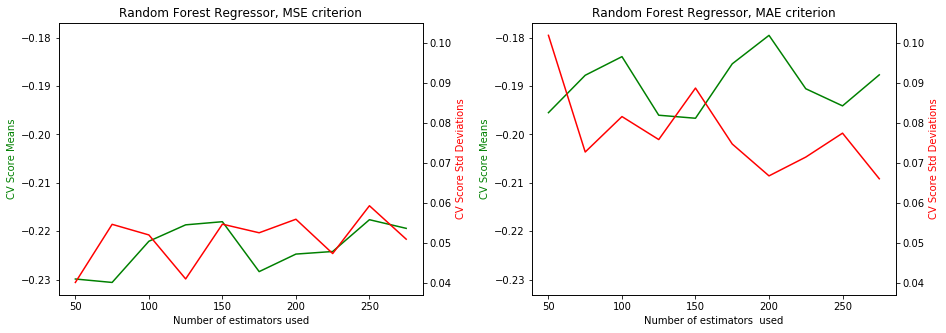

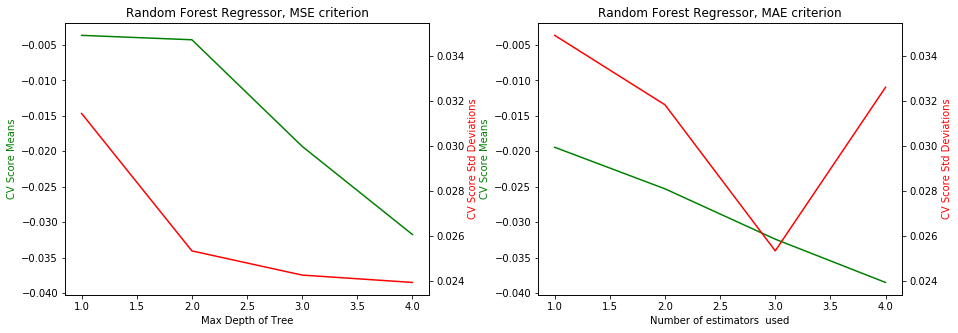

In [15]:
x = df[['disability', 'mothersEdu','tvTime', 'cpuTime', 'outdoorTime']]
y = df.allSocialSkills
rfrEsts(x,y)
rfrDepth(x,y,n_est=100)

# one hot encode

In [3]:
df = pd.get_dummies(df, columns=['gender', 'mothersEdu'])

In [4]:
df.head()

,ID,age,disability,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime,gender_Female,gender_Male,mothersEdu_1,mothersEdu_2,mothersEdu_3
0,30208,3.030801,0,78,38,24,12,0,0,3.000000,2.000000,1.0,1.500000,1,0,0,0,1
1,30400,3.865845,0,82,39,27,10,1,1,0.000000,0.000000,0.0,4.000000,1,0,0,0,1
2,30863,2.130048,0,68,35,18,11,1,0,0.857143,0.857143,0.0,1.714286,1,0,0,0,1
3,30530,2.105407,0,63,29,20,12,1,0,0.500000,0.500000,0.0,1.500000,0,1,0,0,1
4,300057,2.403833,0,78,38,25,11,1,0,0.357143,0.357143,0.0,1.500000,1,0,0,0,1


# PCA with categorical (onehotencoded) variables

Let's start with just 2 binary variables. How would these look on a scatter plot? We'd expect just 4 clusters of points:

ID
mothersEdu_3 meetStReqs     
0            0           116
             1            28
1            0           299
             1           132

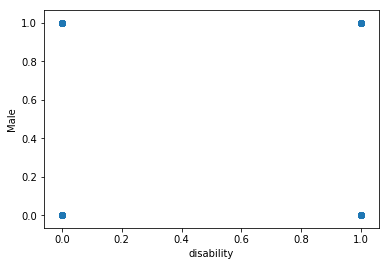

In [5]:
grp = pd.DataFrame(df.groupby(['mothersEdu_3', 'meetStReqs'])['ID'].agg('count'))
display(grp)
plt.scatter(df.disability,df.gender_Male)
plt.xlabel('disability')
plt.ylabel('Male')
plt.show()

If we were to do PCA on this, what would we expect to get? The first eigenvector would just be a line that connects the two most "populous" cluster. In this case, the first component would be the abled points, and the seoncd would be the disabled. 

# Let's dig into some fake boolean data

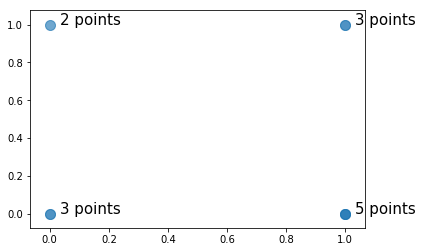

In [635]:
fake = [
    [1.,0.,1.,1.,0.,0.,0.,1.,1.,1.,1.,1.,0.],
    [1.,0.,1.,1.,0.,0.,1.,0.,0.,0.,0.,0.,1.]
]
# fake = [
#     [1.,1.,0.,0.,1.,1.,0.,0.,1.],
#     [1.,0.,1.,0.,1.,0.,1.,0.,0.]
# ]

fake = pd.DataFrame(np.array(fake).T.tolist(),columns=['one','two'])
x = fake.one
y = fake.two
hist, xbins,ybins = np.histogram2d(y,x, bins=range(3))
X,Y = np.meshgrid(xbins[:-1], ybins[:-1])
X = X[hist != 0]
Y = Y[hist != 0]
Z   = hist[hist != 0]
fig, ax = plt.subplots()
ax.scatter(x,y, s=100, alpha=0.4, marker='o')
for i in range(len(Z)):
    ax.annotate(str(int(Z[i]))+" points", xy=(X[i],Y[i]), xytext=(10,0), 
                textcoords="offset points", fontsize=15 )

plt.show()

In [685]:
X = StandardScaler(with_mean=True, with_std=True).fit_transform(fake)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Covariance Matrix:
 [[ 1.08333333 -0.02708333]
 [-0.02708333  1.08333333]]


In [686]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 2).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.70710678]
 [-0.70710678]]
Eigenvalue 1: 1.05625
----------------------------------------
Eigenvector 2: 
[[ 0.70710678]
 [-0.70710678]]
Eigenvalue 2: 1.1104166666666664
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.4875 0.5125]


In [688]:
from scipy.stats import rankdata
ev_order = rankdata(eig_val_cov, method='ordinal')
ev_order
eig_vec_cov = np.asarray([eig_vec_cov[i-1] for i in ev_order])
eig_vec_cov

array([[-0.70710678,  0.70710678],
       [-0.70710678, -0.70710678]])

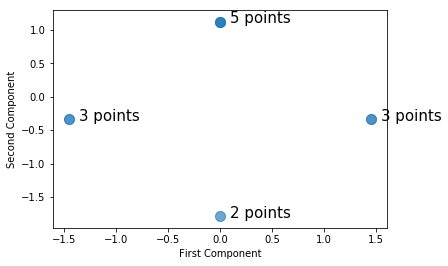

In [690]:
#Create the components
P = eig_vec_cov[:,0]
comp1 = P.T.dot(Xt)
P = eig_vec_cov[:,1]
comp2 = P.T.dot(Xt)

#Round them for convenient labelling
x=np.round(comp1,2)
y=np.round(comp2,2)

##set histogram bins to be neatly around the 4 possible values
xuniq = list(set(x))
xuniq.sort()
xedges = np.asarray([i+.5 for i in xuniq])
xedges = np.insert(xedges,0,xuniq[0]-.5)
yuniq = list(set(y))
yuniq.sort()
yedges = np.asarray([i+.5 for i in yuniq])
yedges = np.insert(yedges,0,yuniq[0]-.5)
bins=np.asarray([yedges,xedges])

#Create 2D histogram for labels
hist, xbins,ybins = np.histogram2d(y,x, bins=bins)
#create meshgrid for label coordinates
B,C = np.meshgrid(xuniq, yuniq)
#Don't label zeroes in the histogram
X = B[hist != 0]
Y = C[hist != 0]
Z   = hist[hist != 0]

fig, ax = plt.subplots()
ax.scatter(x,y, s=100, alpha=0.4, marker='o')
plt.xlabel('First Component')
plt.ylabel('Second Component')
for i in range(len(Z)):
    ax.annotate(str(int(Z[i]))+" points", xy=(X[i],Y[i]), xytext=(10,-1), 
                textcoords="offset points", fontsize=15)
plt.show()

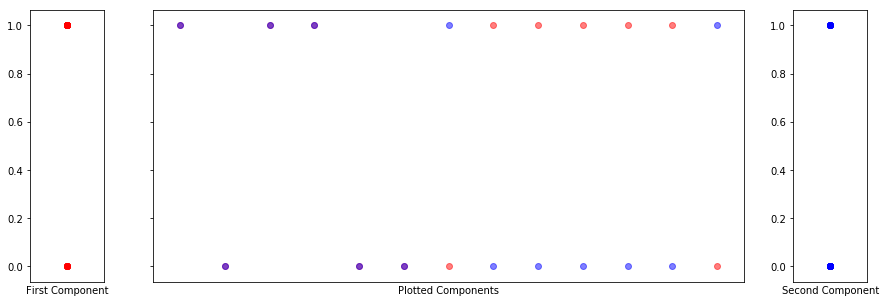

In [606]:

fig = plt.figure(figsize=[15,5])
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 8, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.scatter([0 for y in fake.one],fake.one, color='red')
plt.xlabel('First Component')
plt.xticks([])

ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2.axis = ax1.axis
ax2.plot(fake.one, color='red', marker='o', linestyle='None', alpha=.5)
ax2.plot(fake.two, color='blue', marker='o', linestyle='None', alpha=.5)
plt.xlabel('Plotted Components')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xticks([])


ax3 = fig.add_subplot(gs[2], sharey=ax1)
ax3.scatter([0 for y in fake.two],fake.two, color='blue')
plt.xlabel('Second Component')
plt.xticks([])


plt.show()

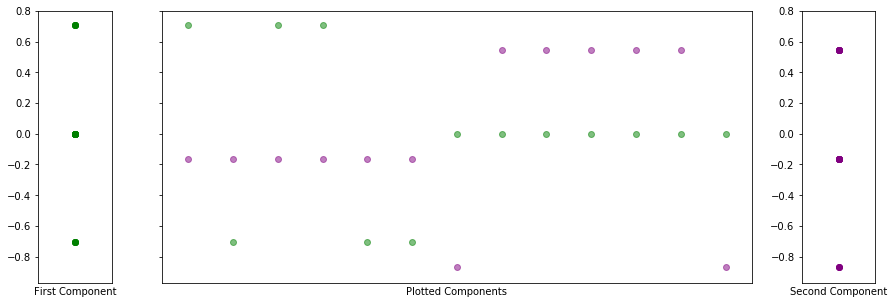

In [607]:

fig = plt.figure(figsize=[15,5])
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 8, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.scatter([0 for y in comp1],comp1, color='green')
plt.xlabel('First Component')
plt.xticks([])

ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2.axis = ax1.axis
ax2.plot(comp1, color='green', marker='o', linestyle='None', alpha=.5)
ax2.plot(comp2, color='purple', marker='o', linestyle='None', alpha=.5)
plt.xlabel('Plotted Components')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xticks([])


ax3 = fig.add_subplot(gs[2], sharey=ax1)
ax3.scatter([0 for y in comp2],comp2, color='purple')
plt.xlabel('Second Component')
plt.xticks([])


plt.show()

In [560]:
hist


array([[0., 0., 0.],
       [0., 5., 0.],
       [3., 1., 3.]])

In [561]:
bins

array([[-2. , -1. ,  0.5,  2. ],
       [-1.5, -0.5,  1. ,  2.5]])

In [545]:
C

array([[-1. , -1. , -1. ],
       [ 0.5,  0.5,  0.5],
       [ 2. ,  2. ,  2. ]])

In [546]:
X

array([ 0. , -1.5,  0. ,  1.5])

In [547]:
Y

array([0.5, 2. , 2. , 2. ])

In [549]:
bins

array([[-2.5, -1. ,  0.5,  2. ],
       [-2. , -0.5,  1. ,  2.5]])

In [524]:
hist

array([[0., 3., 0.],
       [5., 0., 1.],
       [0., 3., 0.]])

In [509]:
print(X,'\n\n',Y)

[-1.5  0.   1.5 -1.5  0.   1.5 -1.5  0.   1.5] 

 [-1.  -1.  -1.   0.5  0.5  0.5  2.   2.   2. ]


In [510]:
print(B,'\n\n',C)

[[-1.5  0.   1.5]
 [-1.5  0.   1.5]
 [-1.5  0.   1.5]] 

 [[-1.  -1.  -1. ]
 [ 0.5  0.5  0.5]
 [ 2.   2.   2. ]]


In [529]:
Z

array([5., 3., 1., 3.])

In [244]:
comp2

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  2. , -1. , -1. , -1. , -1. ,
       -1. ])

In [258]:
df[['disability','meetStReqs','meetPhysReqs','gender_Female', 'gender_Male',
       'mothersEdu_1', 'mothersEdu_2', 'mothersEdu_3']].corr()

,disability,meetStReqs,meetPhysReqs,gender_Female,gender_Male,mothersEdu_1,mothersEdu_2,mothersEdu_3
disability,1.000000,-0.108984,0.033321,-0.098547,0.098547,0.050854,0.030491,-0.049550
meetStReqs,-0.108984,1.000000,0.030705,0.019774,-0.019774,-0.067050,-0.085005,0.108107
meetPhysReqs,0.033321,0.030705,1.000000,-0.088349,0.088349,-0.006611,0.091772,-0.084962
gender_Female,-0.098547,0.019774,-0.088349,1.000000,-1.000000,0.054826,0.009699,-0.031295
gender_Male,0.098547,-0.019774,0.088349,-1.000000,1.000000,-0.054826,-0.009699,0.031295
mothersEdu_1,0.050854,-0.067050,-0.006611,0.054826,-0.054826,1.000000,-0.095229,-0.311004
mothersEdu_2,0.030491,-0.085005,0.091772,0.009699,-0.009699,-0.095229,1.000000,-0.916473
mothersEdu_3,-0.049550,0.108107,-0.084962,-0.031295,0.031295,-0.311004,-0.916473,1.000000


In [123]:
pcacols = df[['mothersEdu_3', 'meetStReqs']]

X = StandardScaler(with_std=False, with_mean=True).fit_transform(pcacols)
Xt = X.T
#Xt = [df.disability.tolist(),df.gender_Male.tolist()]
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Covariance Matrix:
 [[0.18804424 0.02102712]
 [0.02102712 0.20118164]]


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


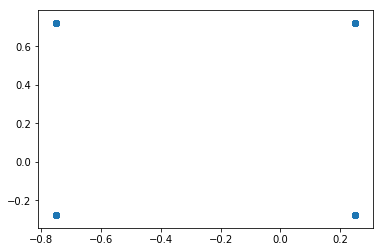

In [125]:
plt.scatter(Xt[0],Xt[1])

In [126]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 2).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.80566153]
 [ 0.59237614]]
Eigenvalue 1: 0.17258369559787098
----------------------------------------
Eigenvector 2: 
[[-0.59237614]
 [-0.80566153]]
Eigenvalue 2: 0.2166421792695738
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.44340242 0.55659758]


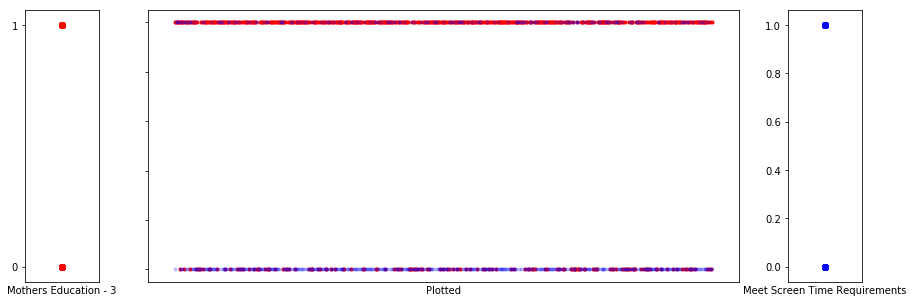

In [127]:

fig = plt.figure(figsize=[15,5])
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 8, 1]) 
ax1 = plt.subplot(gs[0])
ax1.scatter([0 for y in df.mothersEdu_3],df.mothersEdu_3, color='red')
plt.xlabel('Mothers Education - 3')
plt.xticks([])
plt.yticks([0,1])

ax2 = plt.subplot(gs[1])
ax2.axis = ax1.axis
ax2.plot(df.mothersEdu_3, color='red', marker='.', linestyle='None')#, alpha=.5)
ax2.plot(df.meetStReqs, color='blue', marker='.', linestyle='None', alpha=.2)
plt.xlabel('Plotted')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xticks([])



ax3 = plt.subplot(gs[2])
ax3.scatter([0 for y in df.meetStReqs],df.meetStReqs, color='blue')
plt.xlabel('Meet Screen Time Requirements')
plt.xticks([])


plt.show()

In [128]:
eig_vec_cov

array([[-0.80566153, -0.59237614],
       [ 0.59237614, -0.80566153]])

In [145]:
P = eig_vec_cov[:,0]
comp1 = P.T.dot(Xt)
P = eig_vec_cov[:,1]
comp2 = P.T.dot(Xt)


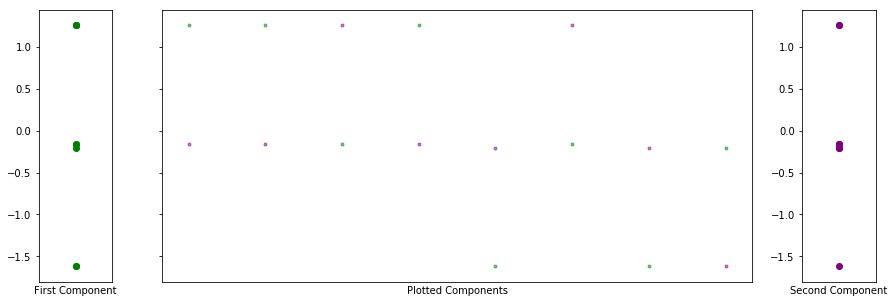

In [146]:

fig = plt.figure(figsize=[15,5])
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 8, 1]) 
ax1 = fig.add_subplot(gs[0])
ax1.scatter([0 for y in comp1],comp1, color='green')
plt.xlabel('First Component')
plt.xticks([])

ax2 = fig.add_subplot(gs[1], sharey=ax1)
ax2.axis = ax1.axis
ax2.plot(comp1, color='green', marker='.', linestyle='None', alpha=.5)
ax2.plot(comp2, color='purple', marker='.', linestyle='None', alpha=.5)
plt.xlabel('Plotted Components')
plt.setp(ax2.get_yticklabels(), visible=False)
plt.xticks([])


ax3 = fig.add_subplot(gs[2], sharey=ax1)
ax3.scatter([0 for y in comp2],comp2, color='purple')
plt.xlabel('Second Component')
plt.xticks([])


plt.show()

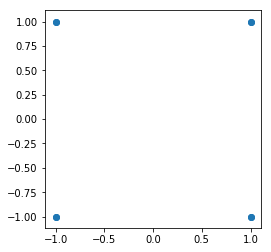

In [141]:
plt.scatter(comp2, comp1)
plt.gca().set_aspect('equal', adjustable='box')

In [268]:
spca = PCA(n_components=2)

In [269]:
spca.fit(pcacols)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [270]:
spca.components_

array([[ 0.59237614,  0.80566153],
       [-0.80566153,  0.59237614]])

In [43]:
df.corr()

,ID,age,disability,mothersEdu,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime,gender_Female,gender_Male
ID,1.000000,-0.055861,-0.044302,0.097083,-0.043333,-0.010763,-0.024063,0.087450,0.029624,-0.051090,-0.028493,-0.018725,-0.033882,-0.078397,0.004026,-0.004026
age,-0.055861,1.000000,0.099874,-0.004323,0.233644,0.195447,0.276192,0.025579,-0.206479,0.078614,0.133485,0.107997,0.118716,0.038923,-0.047227,0.047227
disability,-0.044302,0.099874,1.000000,-0.058910,-0.166169,-0.198419,-0.141133,-0.036276,-0.108984,0.033321,0.042901,0.034862,0.036876,0.016628,-0.098547,0.098547
mothersEdu,0.097083,-0.004323,-0.058910,1.000000,0.007182,-0.016003,0.032665,-0.004370,0.113676,-0.069275,-0.203934,-0.191506,-0.126662,-0.112188,-0.044888,0.044888
allSocialSkills,-0.043333,0.233644,-0.166169,0.007182,1.000000,0.810584,0.878970,-0.478303,0.043760,0.064205,-0.071117,-0.068313,-0.043249,0.101425,0.111081,-0.111081
express,-0.010763,0.195447,-0.198419,-0.016003,0.810584,1.000000,0.531880,-0.094974,0.002590,0.073378,-0.032182,-0.034606,-0.013458,0.089873,0.117113,-0.117113
comply,-0.024063,0.276192,-0.141133,0.032665,0.878970,0.531880,1.000000,-0.342055,0.044670,0.047801,-0.083572,-0.083300,-0.043947,0.078911,0.112272,-0.112272
disrupt,0.087450,0.025579,-0.036276,-0.004370,-0.478303,-0.094974,-0.342055,1.000000,-0.077587,-0.033848,0.026826,0.013433,0.040549,-0.086686,-0.016730,0.016730
meetStReqs,0.029624,-0.206479,-0.108984,0.113676,0.043760,0.002590,0.044670,-0.077587,1.000000,0.030705,-0.538019,-0.497211,-0.346854,-0.020111,0.019774,-0.019774
meetPhysReqs,-0.051090,0.078614,0.033321,-0.069275,0.064205,0.073378,0.047801,-0.033848,0.030705,1.000000,0.125045,0.127757,0.057290,0.715247,-0.088349,0.088349


# PCA

In [115]:
#pcacols = df[['meetPhysReqs','tvTime', 'cpuTime', 'outdoorTime', 'age', ]]
pcacols = df[['express', 'allSocialSkills', ]]

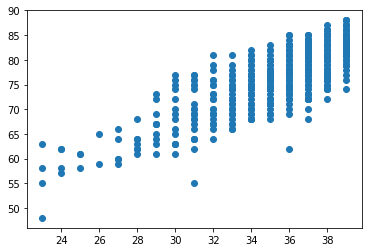

In [118]:
plt.scatter(df.express, df.allSocialSkills)

In [116]:
X = StandardScaler().fit_transform(pcacols)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

Covariance Matrix:
 [[1.00174216 0.81199625]
 [0.81199625 1.00174216]]


c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [117]:
# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 2).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[-0.70710678]
 [ 0.70710678]]
Eigenvalue 1: 0.18974590837737204
----------------------------------------
Eigenvector 2: 
[[-0.70710678]
 [-0.70710678]]
Eigenvalue 2: 1.8137384121801188
----------------------------------------
The percentage of total variance in the dataset explained by each component calculated by hand.
 [0.09470796 0.90529204]


In [119]:
P = eig_vec_cov[:,0]
comp1 = P.T.dot(Xt)
P = eig_vec_cov[:,1]
comp2 = P.T.dot(Xt)

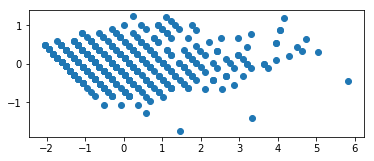

In [122]:
plt.scatter(comp2, comp1)
plt.gca().set_aspect('equal', adjustable='box')

In [35]:
features = df[['age', 'disability', 'meetStReqs','gender_Female', 'gender_Male', 'mothersEdu_1',
               'mothersEdu_2', 'mothersEdu_3','allSocialSkills']]

#Also keep all pca components for now
for i in range(len(eig_vec_cov)):
    P = eig_vec_cov[:,i]
    Y = P.T.dot(Xt)
    features['pca'+str(i)] = Y
features.head()

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age,disability,meetStReqs,gender_Female,gender_Male,mothersEdu_1,mothersEdu_2,mothersEdu_3,allSocialSkills,pca0,pca1,pca2,pca3,pca4
0,3.030801,0,0,1,0,0,0,1,78,0.745002,-0.198409,-0.884849,1.114220,-0.161160
1,3.865845,0,1,1,0,0,0,1,82,-0.308857,-0.250152,1.618781,-0.790571,-0.417308
2,2.130048,0,1,1,0,0,0,1,68,1.637655,0.064456,0.807281,1.303219,0.205702
3,2.105407,0,1,0,1,0,0,1,63,1.816108,0.017249,0.910025,1.244538,0.016023
4,2.403833,0,1,1,0,0,0,1,78,1.807361,0.052116,0.835035,0.928900,-0.050442


In [38]:
regr = linear_model.LinearRegression()
x = features.drop('allSocialSkills', axis=1)
y = features['allSocialSkills']

regr.fit(x,y)
scores = cross_val_score(regr,x,y,cv=10)
print("Fold Scores: ",scores)
print("\nAverage Score: ",np.mean(scores))

#statsmodels
linear_formula = 'allSocialSkills ~ age+disability+meetStReqs+gender_Female+gender_Male+mothersEdu_1+mothersEdu_2+mothersEdu_3+pca0+pca1+pca2+pca3'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=features).fit()
lm.summary()

Fold Scores:  [ 0.18751535 -0.07366142 -0.08597002  0.1838603   0.06126694  0.1011836
  0.02568269 -0.0113406   0.13309312 -0.0632108 ]

Average Score:  0.0458419155252137


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        allSocialSkills   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     8.749
Date:                Mon, 31 Dec 2018   Prob (F-statistic):           2.13e-13
Time:                        10:51:11   Log-Likelihood:                -1843.0
No. Observations:                 575   AIC:                             3708.
Df Residuals:                     564   BIC:                             3756.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        62.4301     19.899      3.137      0.002      23.345     101.515
age              -9.9392      9.640     -1.031      0.303     -28.873       8.995
disability       -4.0164      0.906     -4.433      0.000      -5.796      -2.237
meetStReqs        0.0141      0.688      0.021      0.984      -1.337       1.366
gender_Female    31.9984      9.985      3.205      0.001      12.387      51.610
gender_Male      30.4316      9.921      3.067      0.002      10.945      49.918
mothersEdu_1     20.6461      6.683      3.089      0.002       7.519      33.774
mothersEdu_2     21.0329      6.695      3.142      0.002       7.883      34.182
mothersEdu_3     20.7511      6.643      3.124      0.002       7.702      33.800
pca0             -1.8962      1.463     -1.296      0.196      -4.770       0.978
pca1              2.0092      0.795      2.526      0.012       0.447       3.571
pca2             -3.6200      3.587     -1.009      0.313     -10.666       3.426
pca3            -10.3078      8.226     -1.253      0.211     -26.465       5.849
==============================================================================
Omnibus:                       44.645   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.297
Skew:                          -0.697   Prob(JB):                     2.67e-12
Kurtosis:                       3.529   Cond. No.                     3.02e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.09e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Object `mca` not found.


In [45]:
df.head()

,ID,gender,age,disability,mothersEdu,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime
0,30208,Female,3.030801,0,3,78,38,24,12,0,0,3.000000,2.000000,1.0,1.500000
1,30400,Female,3.865845,0,3,82,39,27,10,1,1,0.000000,0.000000,0.0,4.000000
2,30863,Female,2.130048,0,3,68,35,18,11,1,0,0.857143,0.857143,0.0,1.714286
3,30530,Male,2.105407,0,3,63,29,20,12,1,0,0.500000,0.500000,0.0,1.500000
4,300057,Female,2.403833,0,3,78,38,25,11,1,0,0.357143,0.357143,0.0,1.500000


In [50]:
#statsmodels


linear_formula = 'allSocialSkills ~ express+comply'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print(linear_formula,lm.rsquared)

linear_formula = 'allSocialSkills ~ express+disrupt'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print(linear_formula,lm.rsquared)

linear_formula = 'allSocialSkills ~ comply+disrupt'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
print(linear_formula,lm.rsquared)

linear_formula = 'allSocialSkills ~ express+comply+disrupt'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

allSocialSkills ~ express+comply 0.9367238607113808
allSocialSkills ~ express+disrupt 0.8195695059274983
allSocialSkills ~ comply+disrupt 0.8083286253066162


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        allSocialSkills   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 2.308e+04
Date:                Mon, 31 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:27:46   Log-Likelihood:                -502.61
No. Observations:                 575   AIC:                             1013.
Df Residuals:                     571   BIC:                             1031.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.8906      0.328     75.824      0.000      24.246      25.535
express        1.0021      0.009    113.189      0.000       0.985       1.019
comply         0.9953      0.009    109.667      0.000       0.977       1.013
disrupt       -0.8680      0.014    -62.024      0.000      -0.895      -0.840
==============================================================================
Omnibus:                      307.689   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1700.859
Skew:                           2.425   Prob(JB):                         0.00
Kurtosis:                       9.890   Cond. No.                         606.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
df[['express', 'comply', 'disrupt', 'allSocialSkills']].corr()

,express,comply,disrupt,allSocialSkills
express,1.000000,0.531880,-0.094974,0.810584
comply,0.531880,1.000000,-0.342055,0.878970
disrupt,-0.094974,-0.342055,1.000000,-0.478303
allSocialSkills,0.810584,0.878970,-0.478303,1.000000


In [52]:
df.columns

Index(['ID', 'gender', 'age', 'disability', 'mothersEdu', 'allSocialSkills',
       'express', 'comply', 'disrupt', 'meetStReqs', 'meetPhysReqs',
       'screenTime', 'tvTime', 'cpuTime', 'outdoorTime'],
      dtype='object')

In [54]:
from sklearn.linear_model import Lasso

In [62]:
lass = Lasso(alpha=1)
#x = df[['express', 'comply', 'disrupt', 'tvTime', 'outdoorTime', 'age','screenTime','cpuTime', 'disability']]
x = df[['tvTime', 'outdoorTime', 'age','screenTime','cpuTime', 'disability', 'mothersEdu']]
y = df.allSocialSkills


lass.fit(x,y)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
lass.coef_

array([-0.        ,  0.06020972,  0.4614311 , -0.        , -0.        ,
       -0.        ,  0.        ])

In [65]:
cross_val_score(lass,x,y,cv=2)

array([0.01061746, 0.02751492])

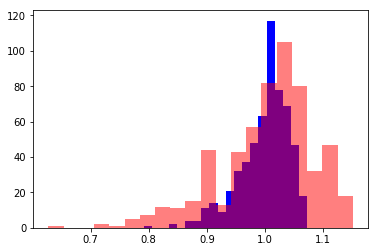

In [90]:
plt.hist((df.allSocialSkills / df.allSocialSkills.mean())**(1/2), color='blue', bins=20)
plt.hist(df.allSocialSkills / df.allSocialSkills.mean(), alpha=.5, color='r', bins=20)
plt.show()

In [107]:
df['newy'] = df.allSocialSkills / df.allSocialSkills.mean()**(1/3)

In [112]:

#statsmodels
linear_formula = 'newy ~ age+disability+tvTime+outdoorTime+cpuTime+disrupt+comply'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   newy   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     352.3
Date:                Mon, 31 Dec 2018   Prob (F-statistic):          8.06e-202
Time:                        17:15:04   Log-Likelihood:                -571.02
No. Observations:                 575   AIC:                             1158.
Df Residuals:                     567   BIC:                             1193.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.6925      0.324     32.965      0.000      10.055      11.330
age             0.0450      0.031      1.438      0.151      -0.016       0.106
disability     -0.3510      0.100     -3.508      0.000      -0.548      -0.154
tvTime         -0.0069      0.022     -0.307      0.759      -0.051       0.037
outdoorTime     0.0184      0.015      1.223      0.222      -0.011       0.048
cpuTime        -0.0083      0.044     -0.190      0.849      -0.095       0.078
disrupt        -0.1706      0.016    -10.660      0.000      -0.202      -0.139
comply          0.3536      0.009     37.582      0.000       0.335       0.372
==============================================================================
Omnibus:                       56.139   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.492
Skew:                          -0.769   Prob(JB):                     1.81e-16
Kurtosis:                       3.812   Cond. No.                         330.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

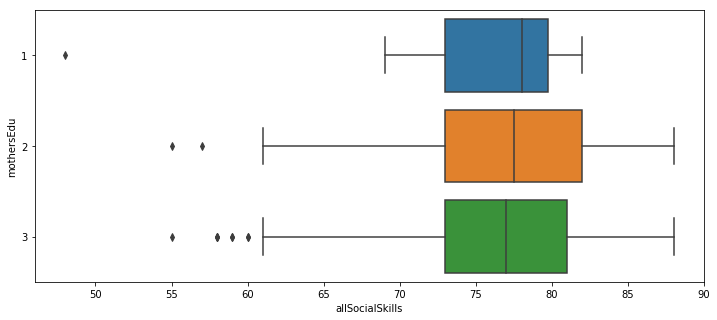

In [114]:
plt.figure(figsize=[12,5])
sns.boxplot(x='allSocialSkills', y='mothersEdu', data=df, orient='h')
plt.show()

In [119]:
df.groupby('mothersEdu')['ID'].agg('count')

,ID,gender,age,disability,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime,newy
mothersEdu,,,,,,,,,,,,,,,
1,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2,126,126,126,126,126,126,126,126,126,126,126,126,126,126,126
3,431,431,431,431,431,431,431,431,431,431,431,431,431,431,431


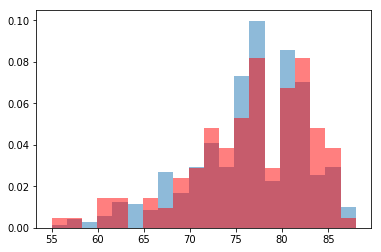

In [122]:
plt.hist(df[df.mothersEdu==3]['allSocialSkills'], alpha=.5, density=True, bins=20)
plt.hist(df[df.mothersEdu==2]['allSocialSkills'], alpha=.5, color='r', density=True, bins=20)
plt.show()

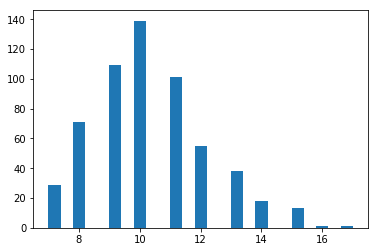

In [124]:
#Logistic Regression on disruptive (remedial program y/n?)
#ROC
plt.hist(df.disrupt, bins=25)
plt.show()

In [125]:
df.head(1)

,ID,gender,age,disability,mothersEdu,allSocialSkills,express,comply,disrupt,meetStReqs,meetPhysReqs,screenTime,tvTime,cpuTime,outdoorTime,newy
0,30208,Female,3.030801,0,3,78,38,24,12,0,0,3.0,2.0,1.0,1.5,18.376317


In [132]:
df['tvint'] = df['tvTime'].astype('int')

In [136]:
ohe = pd.get_dummies(df, columns=['tvint'])
ohe.columns

Index(['ID', 'gender', 'age', 'disability', 'mothersEdu', 'allSocialSkills',
       'express', 'comply', 'disrupt', 'meetStReqs', 'meetPhysReqs',
       'screenTime', 'tvTime', 'cpuTime', 'outdoorTime', 'newy', 'tvint_0',
       'tvint_1', 'tvint_2', 'tvint_3', 'tvint_4', 'tvint_5', 'tvint_6',
       'tvint_7', 'tvint_8', 'tvint_10', 'tvint_11'],
      dtype='object')

In [138]:
pcacols = ohe[['disability']]
X = StandardScaler().fit_transform(pcacols)
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00174216 -0.57648782 -0.31380587 -0.16154588 -0.11858979 -0.050764
  -0.05866852 -0.0292575  -0.050764   -0.0292575  -0.0292575 ]
 [-0.57648782  1.00174216 -0.36882533 -0.18986966 -0.13938209 -0.05966443
  -0.06895485 -0.03438721 -0.05966443 -0.03438721 -0.03438721]
 [-0.31380587 -0.36882533  1.00174216 -0.10335381 -0.07587137 -0.03247779
  -0.03753494 -0.01871836 -0.03247779 -0.01871836 -0.01871836]
 [-0.16154588 -0.18986966 -0.10335381  1.00174216 -0.03905824 -0.01671942
  -0.01932282 -0.00963613 -0.01671942 -0.00963613 -0.00963613]
 [-0.11858979 -0.13938209 -0.07587137 -0.03905824  1.00174216 -0.01227362
  -0.01418476 -0.00707382 -0.01227362 -0.00707382 -0.00707382]
 [-0.050764   -0.05966443 -0.03247779 -0.01671942 -0.01227362  1.00174216
  -0.00607198 -0.00302805 -0.00525389 -0.00302805 -0.00302805]
 [-0.05866852 -0.06895485 -0.03753494 -0.01932282 -0.01418476 -0.00607198
   1.00174216 -0.00349955 -0.00607198 -0.00349955 -0.00349955]
 [-0.0292575  -0.034387

c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\greg\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [139]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 11).T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print(
    'The percentage of total variance in the dataset explained by each',
    'component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov)
)

Eigenvector 1: 
[[0.56230575]
 [0.58727163]
 [0.44642791]
 [0.26196501]
 [0.19688556]
 [0.08623958]
 [0.0994938 ]
 [0.04987741]
 [0.08623958]
 [0.04987741]
 [0.04987741]]
Eigenvalue 1: 1.3322676295501878e-15
----------------------------------------
Eigenvector 2: 
[[ 0.66059718]
 [-0.74210109]
 [ 0.10137456]
 [ 0.03762188]
 [ 0.02639325]
 [ 0.01083918]
 [ 0.01256539]
 [ 0.00620931]
 [ 0.01083918]
 [ 0.00620931]
 [ 0.00620931]]
Eigenvalue 2: 1.5836550214785123
----------------------------------------
Eigenvector 3: 
[[ 0.46684562]
 [ 0.29141102]
 [-0.81303187]
 [-0.14453924]
 [-0.09568992]
 [-0.03745216]
 [-0.04356495]
 [-0.02131176]
 [-0.03745216]
 [-0.02131176]
 [-0.02131176]]
Eigenvalue 3: 1.280347665141226
----------------------------------------
Eigenvector 4: 
[[-0.15814604]
 [-0.12780892]
 [-0.34135681]
 [ 0.84075521]
 [ 0.31461798]
 [ 0.09174404]
 [ 0.10863761]
 [ 0.05046575]
 [ 0.09174404]
 [ 0.05046575]
 [ 0.05046575]]
Eigenvalue 4: 1.0804584069279677
-------------------------

In [ ]:


features = df[['age', 'disability', 'meetStReqs','gender_Female', 'gender_Male', 'mothersEdu_1',
               'mothersEdu_2', 'mothersEdu_3','allSocialSkills']]

#Also keep all pca components for now
for i in range(len(eig_vec_cov)):
    P = eig_vec_cov[:,i]
    Y = P.T.dot(Xt)
    features['pca'+str(i)] = Y
features.head()

In [80]:
#https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py
from sklearn.preprocessing import quantile_transform

y_trans = quantile_transform(df.allSocialSkills,output_distribution='normal').squeeze()
plt.hist(y_trans)
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[78. 82. 68. 63. 78. 66. 71. 62. 78. 74. 57. 78. 74. 79. 81. 81. 78. 79.
 82. 60. 74. 74. 81. 77. 71. 68. 82. 62. 76. 75. 74. 81. 80. 75. 68. 83.
 82. 83. 80. 82. 67. 79. 71. 63. 76. 77. 83. 74. 73. 70. 84. 87. 74. 70.
 81. 77. 78. 66. 75. 84. 61. 81. 72. 77. 74. 81. 82. 77. 74. 75. 68. 72.
 70. 78. 78. 77. 72. 82. 74. 80. 69. 85. 59. 83. 74. 69. 80. 82. 79. 66.
 78. 73. 82. 82. 76. 86. 85. 65. 75. 86. 75. 78. 83. 83. 77. 77. 76. 76.
 81. 85. 78. 75. 64. 77. 75. 77. 77. 75. 77. 80. 74. 79. 80. 82. 83. 71.
 72. 72. 85. 84. 75. 74. 78. 83. 75. 80. 72. 75. 71. 80. 65. 63. 80. 84.
 72. 85. 63. 77. 79. 73. 74. 73. 76. 71. 82. 81. 77. 80. 67. 85. 83. 69.
 77. 77. 70. 68. 77. 83. 73. 77. 73. 82. 78. 68. 78. 76. 58. 76. 85. 80.
 77. 82. 80. 86. 85. 82. 81. 86. 71. 81. 76. 74. 87. 85. 63. 78. 81. 77.
 84. 82. 58. 81. 86. 66. 81. 65. 76. 83. 68. 83. 76. 87. 68. 67. 78. 76.
 73. 71. 64. 72. 77. 88. 84. 81. 82. 81. 77. 75. 81. 64. 74. 69. 71. 79.
 73. 78. 80. 76. 78. 74. 81. 79. 84. 84. 81. 81. 83. 72. 80. 83. 55. 73.
 84. 77. 73. 78. 78. 67. 80. 77. 78. 75. 82. 84. 84. 78. 77. 81. 62. 83.
 76. 72. 69. 83. 78. 64. 83. 81. 55. 75. 76. 75. 76. 82. 80. 85. 76. 77.
 87. 78. 83. 86. 78. 82. 79. 81. 86. 78. 67. 77. 83. 81. 48. 77. 79. 62.
 73. 78. 77. 74. 64. 82. 77. 80. 69. 76. 76. 81. 73. 73. 66. 63. 72. 82.
 81. 86. 71. 83. 83. 69. 77. 84. 75. 78. 72. 79. 61. 71. 69. 72. 74. 73.
 78. 70. 83. 79. 72. 78. 82. 64. 83. 81. 67. 59. 77. 78. 85. 67. 74. 69.
 68. 70. 77. 67. 80. 77. 70. 77. 62. 83. 69. 84. 77. 84. 73. 77. 78. 72.
 61. 81. 76. 81. 81. 70. 73. 78. 73. 75. 72. 77. 58. 76. 78. 85. 76. 80.
 84. 80. 74. 76. 79. 69. 83. 78. 81. 84. 85. 75. 72. 81. 79. 77. 85. 80.
 84. 82. 70. 69. 78. 62. 80. 80. 82. 85. 78. 81. 81. 61. 74. 76. 72. 88.
 80. 69. 77. 75. 84. 79. 75. 80. 76. 74. 84. 74. 88. 85. 75. 80. 82. 72.
 80. 78. 82. 68. 60. 85. 77. 74. 76. 72. 82. 72. 82. 84. 78. 79. 71. 66.
 70. 84. 84. 83. 64. 80. 82. 80. 71. 72. 80. 81. 76. 78. 74. 84. 72. 78.
 76. 80. 75. 85. 82. 80. 77. 75. 86. 75. 82. 81. 84. 76. 70. 78. 86. 72.
 70. 81. 75. 77. 77. 74. 81. 74. 68. 76. 85. 79. 80. 61. 76. 74. 80. 83.
 69. 70. 81. 75. 69. 70. 78. 84. 77. 78. 79. 81. 81. 79. 64. 83. 77. 84.
 79. 76. 83. 68. 69. 73. 82. 79. 82. 84. 79. 77. 83. 79. 78. 67. 83. 80.
 81. 69. 76. 82. 79. 84. 76. 78. 69. 82. 87. 82. 81. 76. 75. 73. 83.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.